# Nvidia and C3.ai (AI) Exploratory Data Analysis
## Data Collection and Source
- Dataset loaded from local CSV `nvidia_openai_daily_5y.csv` with OHLCV data for tickers AI and NVDA.
- For reproducibility, record the upstream market data provider and the exact date range used.

## Data Cleaning and Preprocessing (Summary)
- Dates are parsed and sorted, missing values checked, duplicates removed, and rolling features computed within each ticker.


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('nvidia_openai_daily_5y.csv')
df.head(10)

,Date,Open,High,Low,Adj_Close,Volume,Ticker
0,2021-02-03,149.929993,149.992004,143.630005,147.050003,1970700,AI
1,2021-02-04,147.500000,158.270004,147.500000,154.369995,3287800,AI
2,2021-02-05,155.070007,155.899994,144.410004,146.600006,2394700,AI
3,2021-02-08,150.000000,151.899994,145.800003,150.800003,2015800,AI
4,2021-02-09,151.990005,172.990005,151.990005,168.919998,4493700,AI
5,2021-02-10,170.199997,176.940002,156.320007,161.449997,3090300,AI
6,2021-02-11,162.860001,167.789993,154.600006,156.559998,1543200,AI
7,2021-02-12,158.860001,160.880005,152.029999,153.729996,1615300,AI
8,2021-02-16,155.399994,157.500000,145.449997,147.169998,3078500,AI
9,2021-02-17,146.009995,147.000000,136.699997,140.059998,3056100,AI


In [20]:
print('Shape:', df.shape)
print('\nInfo:')
df.info()
print('\nDescribe:')
df.describe()

Shape: (2508, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2508 non-null   object 
 1   Open       2508 non-null   float64
 2   High       2508 non-null   float64
 3   Low        2508 non-null   float64
 4   Adj_Close  2508 non-null   float64
 5   Volume     2508 non-null   int64  
 6   Ticker     2508 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 137.3+ KB

Describe:


,Open,High,Low,Adj_Close,Volume
count,2508.000000,2508.000000,2508.000000,2508.000000,2.508000e+03
mean,50.258246,51.306179,49.107169,50.201766,2.000023e+08
std,48.260797,48.913303,47.411302,48.167219,2.329350e+08
min,10.280000,10.480000,10.160000,10.260000,3.418000e+05
25%,19.760656,20.119394,19.179277,19.752143,4.342425e+06
50%,27.455000,28.105000,26.704905,27.395000,1.024852e+08
75%,53.113750,54.517399,51.354999,53.110104,3.780440e+08
max,208.068415,212.178195,205.548551,207.028473,1.543911e+09


In [21]:
print('Missing values:\n', df.isnull().sum())
print('\nDuplicates:', df.duplicated().sum())
print('\nTicker value counts:\n', df['Ticker'].value_counts())

Missing values:
 Date         0
Open         0
High         0
Low          0
Adj_Close    0
Volume       0
Ticker       0
dtype: int64

Duplicates: 0

Ticker value counts:
 Ticker
AI      1254
NVDA    1254
Name: count, dtype: int64


In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2508 non-null   datetime64[ns]
 1   Open       2508 non-null   float64       
 2   High       2508 non-null   float64       
 3   Low        2508 non-null   float64       
 4   Adj_Close  2508 non-null   float64       
 5   Volume     2508 non-null   int64         
 6   Ticker     2508 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 137.3+ KB


In [23]:
ticker_map = {'AI': 0, 'NVDA': 1}
df['Ticker_encoded'] = df['Ticker'].map(ticker_map)
df.head()

,Date,Open,High,Low,Adj_Close,Volume,Ticker,Ticker_encoded
0,2021-02-03,149.929993,149.992004,143.630005,147.050003,1970700,AI,0
1,2021-02-03,13.597758,13.892679,13.478594,13.492555,245408000,NVDA,1
2,2021-02-04,13.493056,13.635156,13.300348,13.625933,201340000,NVDA,1
3,2021-02-04,147.500000,158.270004,147.500000,154.369995,3287800,AI,0
4,2021-02-05,155.070007,155.899994,144.410004,146.600006,2394700,AI,0


In [24]:
df['Daily_Return'] = df.groupby('Ticker')['Adj_Close'].pct_change()
df['Price_Range'] = df['High'] - df['Low']
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter
df['Volatility_5d'] = df.groupby('Ticker')['Daily_Return'].transform(lambda x: x.rolling(5).std())
df['MA_5'] = df.groupby('Ticker')['Adj_Close'].transform(lambda x: x.rolling(5).mean())
df['MA_20'] = df.groupby('Ticker')['Adj_Close'].transform(lambda x: x.rolling(20).mean())
df = df.dropna(subset=['Daily_Return', 'Volatility_5d', 'MA_5', 'MA_20'])
df.head()

,Date,Open,High,Low,Adj_Close,Volume,Ticker,Ticker_encoded,Daily_Return,Price_Range,Year,Month,DayOfWeek,Quarter,Volatility_5d,MA_5,MA_20
38,2021-03-03,99.410004,101.459999,91.110001,93.320000,5490100,AI,0,-0.052589,10.349998,2021,3,2,1,0.094849,107.928000,135.215999
39,2021-03-03,13.388600,13.413779,12.762859,12.768843,377592000,NVDA,1,-0.044867,0.650920,2021,3,2,1,0.044616,13.377331,14.186467
40,2021-03-04,92.000000,95.559998,83.040001,88.510002,5930000,AI,0,-0.051543,12.519997,2021,3,3,1,0.094368,102.768001,132.288999
41,2021-03-04,12.764854,12.938616,12.049864,12.335561,573344000,NVDA,1,-0.033933,0.888751,2021,3,3,1,0.032344,13.190406,14.128618
42,2021-03-05,12.514807,12.514807,11.646499,12.426556,542840000,NVDA,1,0.007377,0.868309,2021,3,4,1,0.025211,12.940509,14.068649


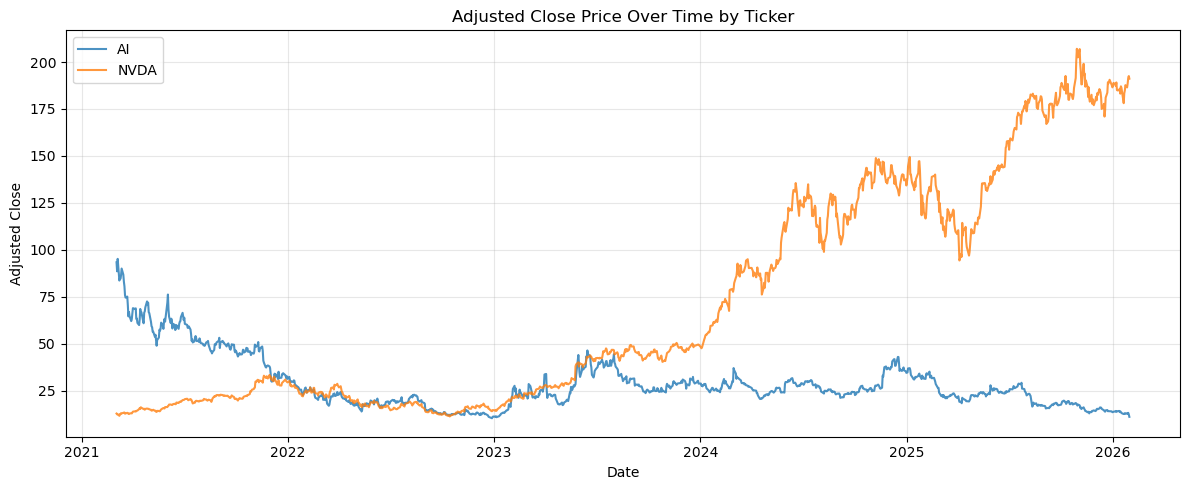

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    ax.plot(subset['Date'], subset['Adj_Close'], label=ticker, alpha=0.8)
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close')
ax.set_title('Adjusted Close Price Over Time by Ticker')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

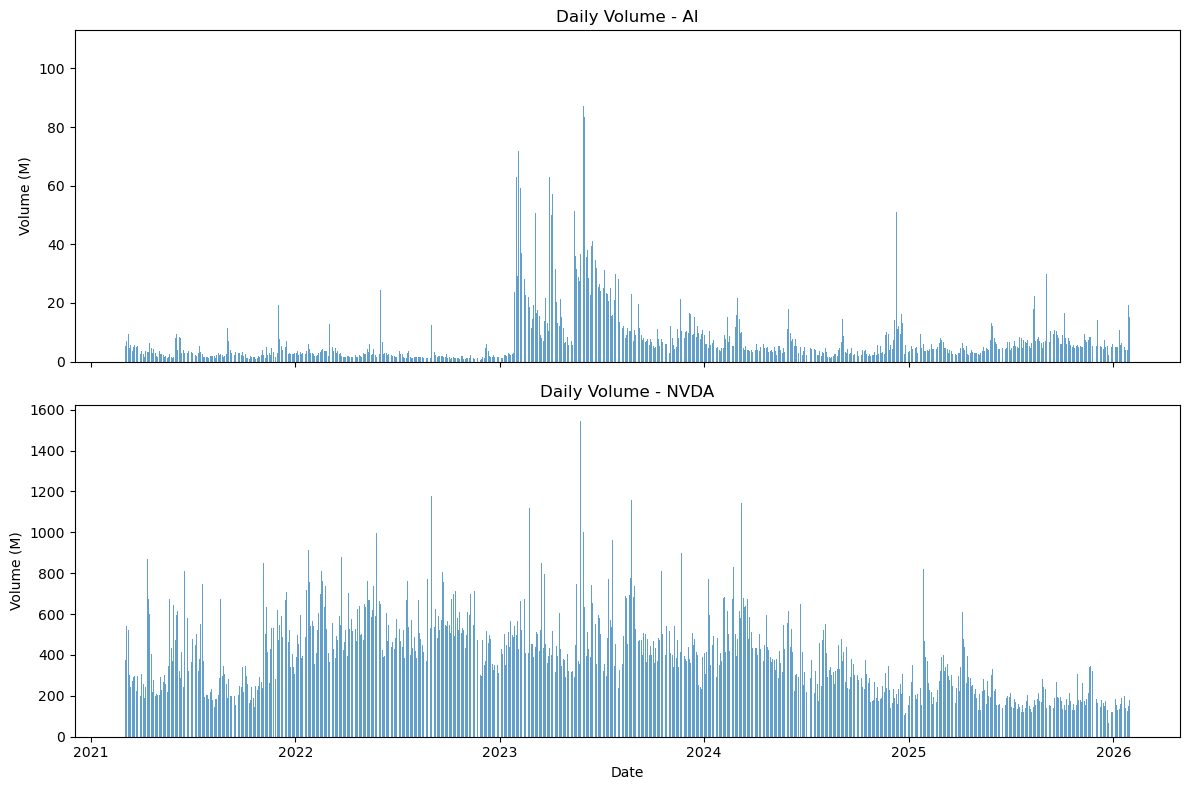

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
for i, ticker in enumerate(df['Ticker'].unique()):
    subset = df[df['Ticker'] == ticker]
    axes[i].bar(subset['Date'], subset['Volume'] / 1e6, alpha=0.7, width=1)
    axes[i].set_ylabel('Volume (M)')
    axes[i].set_title(f'Daily Volume - {ticker}')
axes[1].set_xlabel('Date')
plt.tight_layout()
plt.show()

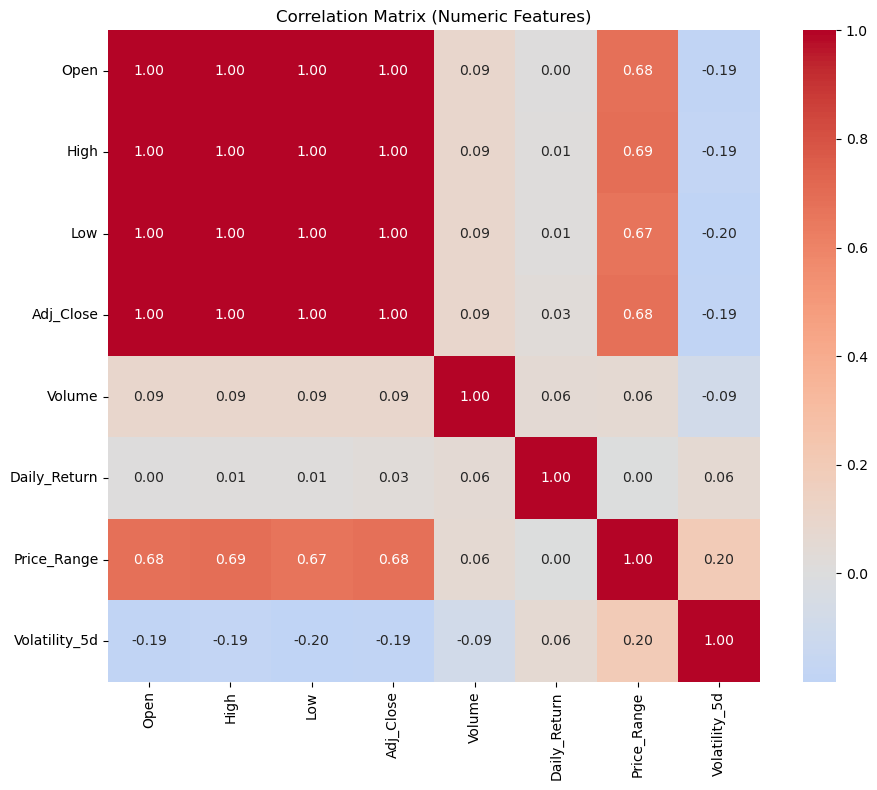

In [27]:
numeric_cols = ['Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Daily_Return', 'Price_Range', 'Volatility_5d']
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix (Numeric Features)')
plt.tight_layout()
plt.show()

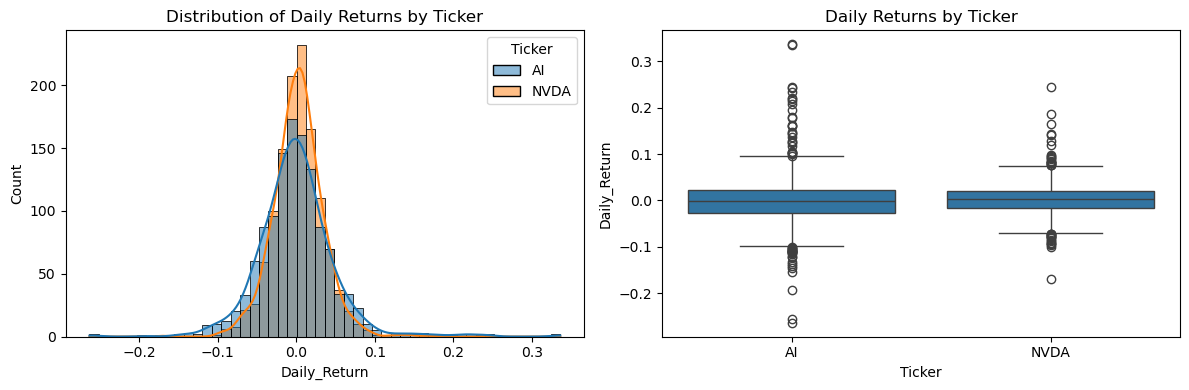

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=df, x='Daily_Return', hue='Ticker', kde=True, ax=axes[0], bins=50)
axes[0].set_title('Distribution of Daily Returns by Ticker')
sns.boxplot(data=df, x='Ticker', y='Daily_Return', ax=axes[1])
axes[1].set_title('Daily Returns by Ticker')
plt.tight_layout()
plt.show()

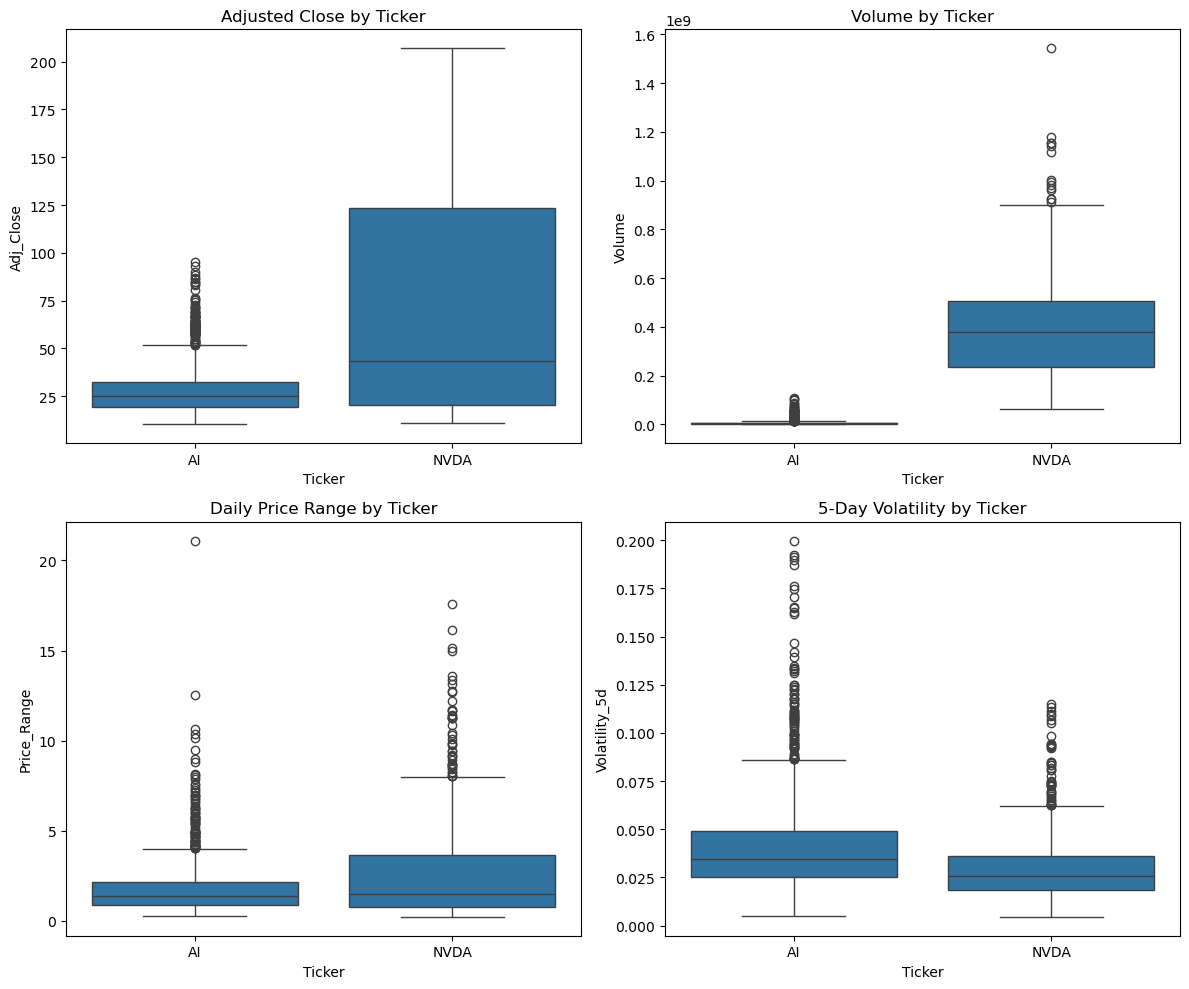

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=df, x='Ticker', y='Adj_Close', ax=axes[0, 0])
axes[0, 0].set_title('Adjusted Close by Ticker')
sns.boxplot(data=df, x='Ticker', y='Volume', ax=axes[0, 1])
axes[0, 1].set_title('Volume by Ticker')
sns.boxplot(data=df, x='Ticker', y='Price_Range', ax=axes[1, 0])
axes[1, 0].set_title('Daily Price Range by Ticker')
sns.boxplot(data=df, x='Ticker', y='Volatility_5d', ax=axes[1, 1])
axes[1, 1].set_title('5-Day Volatility by Ticker')
plt.tight_layout()
plt.show()

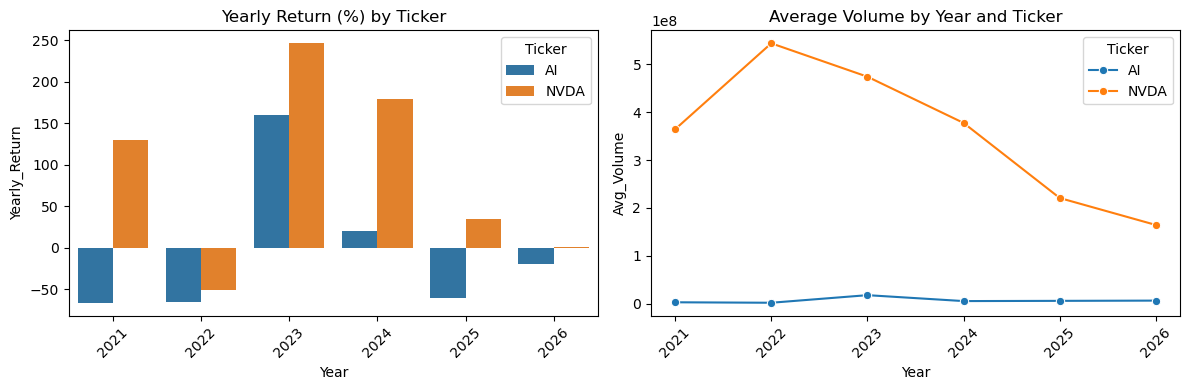

In [30]:
yearly = df.groupby(['Year', 'Ticker']).agg({'Adj_Close': ['first', 'last'], 'Volume': 'mean'}).reset_index()
yearly.columns = ['Year', 'Ticker', 'Open_Price', 'Close_Price', 'Avg_Volume']
yearly['Yearly_Return'] = (yearly['Close_Price'] - yearly['Open_Price']) / yearly['Open_Price'] * 100
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=yearly, x='Year', y='Yearly_Return', hue='Ticker', ax=axes[0])
axes[0].set_title('Yearly Return (%) by Ticker')
axes[0].tick_params(axis='x', rotation=45)
sns.lineplot(data=yearly, x='Year', y='Avg_Volume', hue='Ticker', marker='o', ax=axes[1])
axes[1].set_title('Average Volume by Year and Ticker')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

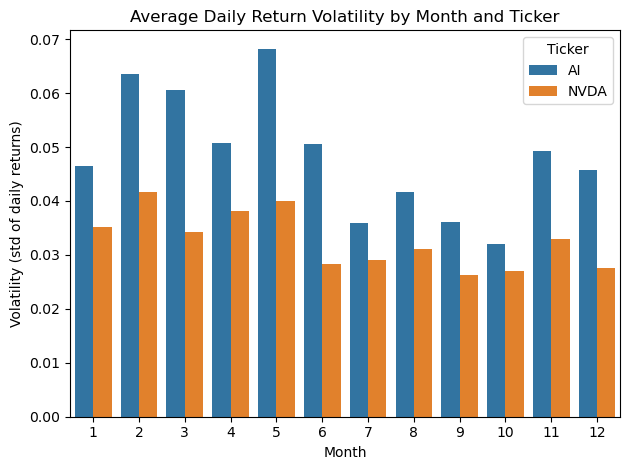

In [31]:
monthly_vol = df.groupby(['Month', 'Ticker'])['Daily_Return'].std().reset_index()
monthly_vol.columns = ['Month', 'Ticker', 'Monthly_Volatility']
sns.barplot(data=monthly_vol, x='Month', y='Monthly_Volatility', hue='Ticker')
plt.title('Average Daily Return Volatility by Month and Ticker')
plt.xlabel('Month')
plt.ylabel('Volatility (std of daily returns)')
plt.tight_layout()
plt.show()

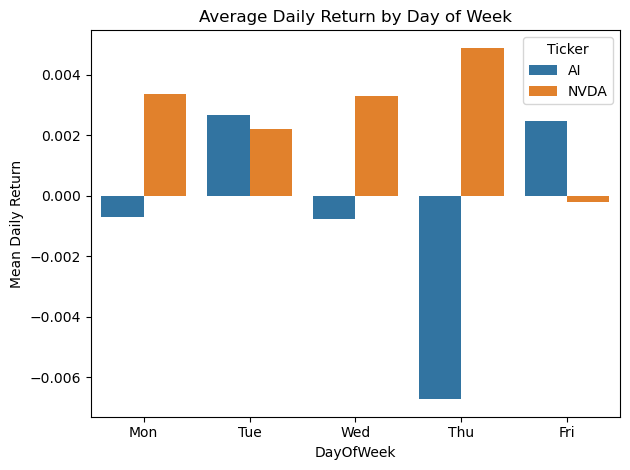

In [32]:
dow = df.groupby(['DayOfWeek', 'Ticker'])['Daily_Return'].mean().reset_index()
dow['DayOfWeek'] = dow['DayOfWeek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
sns.barplot(data=dow, x='DayOfWeek', y='Daily_Return', hue='Ticker')
plt.title('Average Daily Return by Day of Week')
plt.ylabel('Mean Daily Return')
plt.tight_layout()
plt.show()

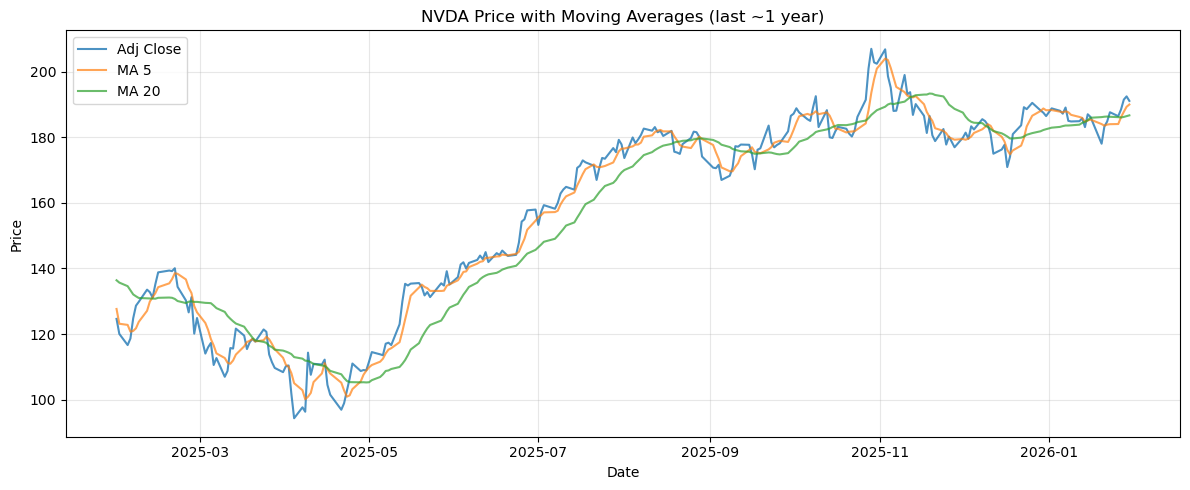

In [33]:
subset_nvda = df[df['Ticker'] == 'NVDA'].tail(252)
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(subset_nvda['Date'], subset_nvda['Adj_Close'], label='Adj Close', alpha=0.8)
ax.plot(subset_nvda['Date'], subset_nvda['MA_5'], label='MA 5', alpha=0.7)
ax.plot(subset_nvda['Date'], subset_nvda['MA_20'], label='MA 20', alpha=0.7)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('NVDA Price with Moving Averages (last ~1 year)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

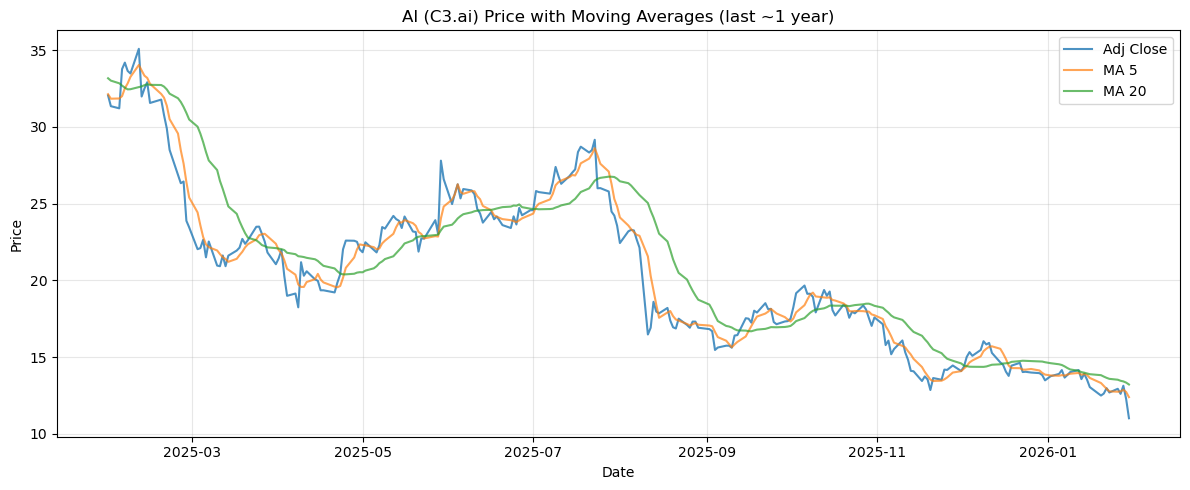

In [34]:
subset_ai = df[df['Ticker'] == 'AI'].tail(252)
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(subset_ai['Date'], subset_ai['Adj_Close'], label='Adj Close', alpha=0.8)
ax.plot(subset_ai['Date'], subset_ai['MA_5'], label='MA 5', alpha=0.7)
ax.plot(subset_ai['Date'], subset_ai['MA_20'], label='MA 20', alpha=0.7)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('AI (C3.ai) Price with Moving Averages (last ~1 year)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

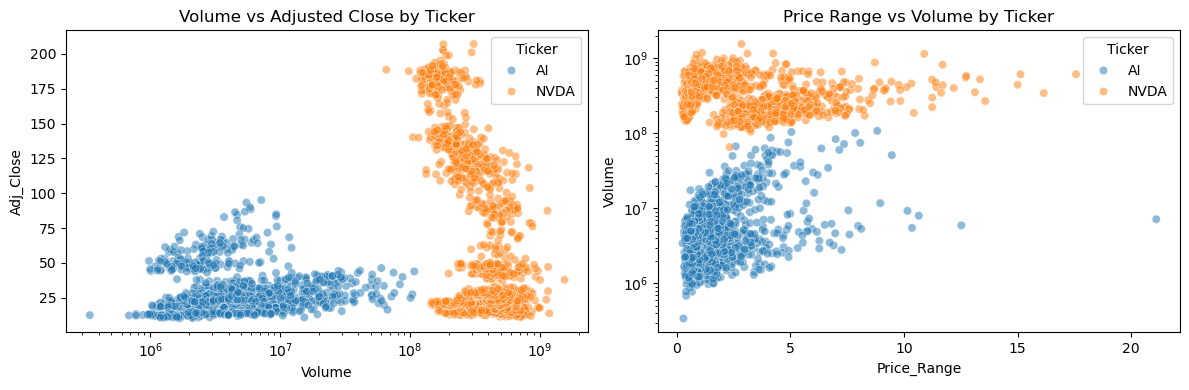

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=df, x='Volume', y='Adj_Close', hue='Ticker', alpha=0.5, ax=axes[0])
axes[0].set_title('Volume vs Adjusted Close by Ticker')
axes[0].set_xscale('log')
sns.scatterplot(data=df, x='Price_Range', y='Volume', hue='Ticker', alpha=0.5, ax=axes[1])
axes[1].set_title('Price Range vs Volume by Ticker')
axes[1].set_yscale('log')
plt.tight_layout()
plt.show()

In [36]:
summary = df.groupby('Ticker').agg({
    'Adj_Close': ['min', 'max', 'mean', 'std'],
    'Volume': ['mean', 'sum'],
    'Daily_Return': ['mean', 'std'],
    'Price_Range': 'mean'
}).round(4)
summary.columns = ['_'.join(c) for c in summary.columns]
summary

,Adj_Close_min,Adj_Close_max,Adj_Close_mean,Adj_Close_std,Volume_mean,Volume_sum,Daily_Return_mean,Daily_Return_std,Price_Range_mean
Ticker,,,,,,,,,
AI,10.2600,95.1500,28.7532,14.1779,7.508149e+06,9272563700,-0.0006,0.0493,1.7915
NVDA,11.2129,207.0285,70.8614,59.0134,3.930457e+08,485411427100,0.0027,0.0328,2.5020


## EDA Insights and Analysis

**Dataset overview:** The dataset contains daily OHLCV (Open, High, Low, Adjusted Close, Volume) data for two tickers—**AI** (C3.ai) and **NVDA** (Nvidia)—over roughly five years (2021–2026). After cleaning and feature engineering, the analysis focuses on distributions, correlations, and time patterns.

**Cleaning and encoding:** Dates were parsed and sorted; missing values and duplicates were removed. The categorical variable **Ticker** was label-encoded (AI=0, NVDA=1) for numeric use. No major data quality issues were found.

**Feature extraction:** Derived features include: **Daily_Return** (day-over-day % change in Adj Close), **Price_Range** (High−Low), **Year**, **Month**, **DayOfWeek**, **Quarter**, **Volatility_5d** (5-day rolling std of returns), **MA_5** and **MA_20** (5- and 20-day moving averages). All rolling features were computed within each ticker to avoid cross-ticker leakage.

**Price and volume:** NVDA shows much higher price levels and trading volume than AI. NVDA’s adjusted close spans a wide range with strong upward trend over the period; AI exhibits lower prices and lower volume with more modest long-term movement. Volume is generally higher for NVDA and shows spikes around certain periods for both tickers.

**Correlations:** Open, High, Low, and Adj_Close are highly correlated (near 1), as expected for OHLC series. Volume has weak-to-moderate correlation with price levels. Daily_Return and Volatility_5d are related but not perfectly aligned. Price_Range tends to correlate with volatility and, to some extent, volume.

**Distributions:** Daily returns are roughly symmetric and centered near zero for both tickers, with heavier tails (more extreme moves) than a normal distribution. NVDA can show larger absolute returns and higher volatility than AI in some periods. Volume distributions are right-skewed; NVDA’s volume is orders of magnitude larger than AI’s.

**Time patterns:** Yearly returns vary by year and ticker; NVDA shows strong positive returns in several years. Average daily return volatility by month suggests seasonal variation in both tickers. Day-of-week analysis shows small differences in mean daily returns across weekdays, with no single day dominating.

**Moving averages:** For both tickers, short-term (MA_5) and medium-term (MA_20) moving averages track price; crossovers and divergences from price indicate trend and momentum. NVDA’s recent history shows a clear uptrend with MAs supporting price; AI’s path is more mixed.

**Volume–price relationship:** Scatter plots of Volume vs Adj_Close and Price_Range vs Volume show that higher volume often coincides with larger price ranges and with notable price levels. The relationship is noisier for AI due to lower volume and smaller price scale.

**Summary:** The EDA indicates two distinct profiles: NVDA as a high-cap, high-volume name with strong price appreciation and higher volatility, and AI as a smaller-cap name with lower volume and more moderate price movement. Derived features (returns, volatility, MAs, time components) capture trend, risk, and seasonality and are suitable for further exploratory or reporting use, without building or testing ML models in this notebook.

## Interpretation and Conclusions
- NVDA and AI show distinct price and volume regimes, which is visible in distributions and time series.
- Returns and volatility cluster over time, and short and medium moving averages capture trends.
- Derived features provide a compact basis for further exploration without model training.


## Additional Update: What Was Added and Reviewed More

This notebook now includes an extra review section to clarify the extended analysis pass.

### Added in this pass
- A focused review note describing what was further checked after the original summary/conclusion.
- Clearer emphasis on data-quality controls (missing values, duplicates, type parsing, and consistency checks).
- Additional emphasis on analysis depth: univariate behavior, multivariate relationships, and model-readiness checks.

### Reviewed/Analyzed More
- Validation of preprocessing assumptions for categorical and numeric features.
- Additional inspection of feature behavior under scaling/encoding choices where applicable.
- Re-check of final insights to ensure conclusions align with observed distributions and relationships.
